In [1]:
import time
import numpy as np
import pandas as pd
import random

# Install Simon
!pip install git+https://github.com/algorine/simon

from Simon import Simon 
from Simon.Encoder import Encoder
from Simon.LengthStandardizer import DataLengthStandardizerRaw

  Cloning https://github.com/algorine/simon to /tmp/pip-req-build-dbcgpuo3
  Running command git clone -q https://github.com/algorine/simon /tmp/pip-req-build-dbcgpuo3
     |████████████████████████████████| 880kB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 83.1MB 550kB/s  eta 0:00:01
     |████████████████████████████████| 81kB 15.6MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 29.3MB/s eta 0:00:01
  Created wheel for Simon: filename=Simon-1.2.4-cp36-none-any.whl size=114957859 sha256=59931e8d53a34a17245a33e8833f9689c1ed604fba9ad5fd07a7b16b3ddb2a87
  Stored in directory: /tmp/pip-ephem-wheel-cache-foa6cvna/wheels/45/18/6e/2d0604c9f019344d262fe0caed95387bec7243cbb0aed7daac
Successfully built Simon
ERROR: ethnicolr 0.2.1 has requirement tensorflow==1.12.3, but you'll have tensorflow 1.12.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found 

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [2]:
### Read-in the emails and print some basic statistics

# Enron
EnronEmails = pd.read_csv('../input/enron-email-bodies/enron_emails_body.csv',dtype='str', header=None)
print("The size of the Enron emails dataframe is:")
print(EnronEmails.shape)
print("Ten Enron emails are:")
print(EnronEmails.loc[:10])

# Spam
SpamEmails = pd.read_csv('../input/fraudulent-email-bodies/fraudulent_emails_body.csv',encoding="ISO-8859-1",dtype='str', header=None)
print("The size of the Spam emails dataframe is:")
print(SpamEmails.shape)
print("Ten Spam emails are:")
print(SpamEmails.loc[:10])

The size of the Enron emails dataframe is:
(20001, 2)
Ten Enron emails are:
      0                                                  1
0   NaN                                                  0
1     0                          here is our forecast\n\n 
2     1  traveling to have a business meeting takes the...
3     2                     test successful.  way to go!!!
4     3  randy,\n\n can you send me a schedule of the s...
5     4                let's shoot for tuesday at 11:45.  
6     5  greg,\n\n how about either next tuesday or thu...
7     6  please cc the following distribution list with...
8     7                   any morning between 10 and 11:30
9     8  1. login:  pallen pw: ke9davis\n\n i don't thi...
10    9  ---------------------- forwarded by phillip k ...
The size of the Spam emails dataframe is:
(5188, 2)
Ten Spam emails are:
      0                                                  1
0   NaN                                               text
1     1  /nURGENT BUSINES

In [3]:
# Some hyper-parameters for the CNN we will use
maxlen = 20 # max length of each tabular cell <==> max number of characters in a line
max_cells = 50 # max number of cells in a column <==> max number of email lines
p_threshold = 0.5 # prediction threshold probability
Nsamp = 5000
nb_epoch = 20

#batch_size = 8
#checkpoint_dir = "trained_models/"

# Convert everything to lower-case, put one sentence per column in a tabular
# structure
ProcessedEnronEmails=[row.lower().split('\n') for row in EnronEmails.iloc[:,1]]
#print("3 Enron emails after Processing (in list form) are:")
#print((ProcessedEnronEmails[:3]))
EnronEmails = pd.DataFrame(random.sample(ProcessedEnronEmails,Nsamp)).transpose()
EnronEmails = DataLengthStandardizerRaw(EnronEmails,max_cells)
#print("Ten Enron emails after Processing (in DataFrame form) are:")
#print((EnronEmails[:10]))
print("Enron email dataframe after Processing shape:")
print(EnronEmails.shape)

ProcessedSpamEmails=[row.lower().split('/n') for row in SpamEmails.iloc[:,1]]
#print("3 Spam emails after Processing (in list form) are:")
#print((ProcessedSpamEmails[:3]))
SpamEmails = pd.DataFrame(random.sample(ProcessedSpamEmails,Nsamp)).transpose()
SpamEmails = DataLengthStandardizerRaw(SpamEmails,max_cells)
#print("Ten Spam emails after Processing (in DataFrame form) are:")
#print((SpamEmails[:10]))
print("Spam email dataframe after Processing shape:")
print(SpamEmails.shape)


# Encode labels and data
Categories = ['spam','notspam']
encoder = Encoder(categories=Categories)
header = ([['spam',]]*Nsamp)
header.extend(([['notspam',]]*Nsamp))

/opt/conda/lib/python3.6/site-packages/Simon/LengthStandardizer.py:52: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  out = DataLengthColumnStandardizerRaw(data.ix[:,0],max_cells)
/opt/conda/lib/python3.6/site-packages/Simon/LengthStandardizer.py:54: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  out = np.concatenate((out,DataLengthColumnStandardizerRaw(data.ix[:,i],max_cells)),axis=1)


Enron email dataframe after Processing shape:
(50, 5000)
Spam email dataframe after Processing shape:
(50, 5000)


DEBUG::raw_data:
[['' 'hello my beloved kind hearted,' '' ... '' ' ' '']
 ['to have mayfair securities co direct the funds to'
  'another bank with you as account holder. this way'
  'there will be no need for you to think of receiving' ...
  'please observe this instruction religiously. please,'
  'again, note i am a family man; i have a wife and'
  'children. i send you this mail not without a measure']
 ['have the firm direct the funds to another bank with you as account holder, this'
  'way there will be no need for you to think of receiving the money from the firm.'
  'we can fine-tune this based on our interactions, i am aware of the consequences'
  ... '' ''
  'family man; i happily married with kids, i send you this mail not without a']
 ...
 ['fletch & wife' 'dorland & wife' 'lorenz & friend' ... 'fletch & wife'
  'king & wife' 'lorenz & friend']
 ['go to transactions - set lineup' '' '' ...
  'to: jason.bass2@compaq.com, phillip m love/hou/ect@ect, bryan '
  'my starting line

/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:133: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=40, kernel_size=1, strides=1, padding="valid", kernel_initializer="glorot_normal")`
  subsample_length=1)(embedded)
/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:136: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  embedded = MaxPooling1D(pool_length=pool_length)(embedded)
/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:133: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=200, kernel_size=3, strides=1, padding="valid", kernel_initializer="glorot_normal")`
  subsample_length=1)(embedded)
/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:133: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=1000, kernel_size=3, strides=1, padding="valid", kernel_initializer="glorot_normal")`
  subsamp

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 20, 71)       0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 20, 40)       2880        lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 20, 40)       0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
max_poolin

/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:154: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2, implementation=2)`
  dropout_U=0.2, consume_less='gpu')(encoded)
/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:156: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, return_sequences=False, go_backwards=True, dropout=0.2, recurrent_dropout=0.2, implementation=2)`
  dropout_U=0.2, consume_less='gpu', go_backwards=True)(encoded)
/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:164: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  model = Model(input=document, output=output)


starting learning


/opt/conda/lib/python3.6/site-packages/Simon/Simon.py:317: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  nb_epoch=nb_epoch, shuffle=True, callbacks=[earlystop_cb, check_cb, loss_history, tbCallBack])


Train on 6000 samples, validate on 3000 samples
Epoch 1/20
6000/6000 [==============================] - 591s 98ms/step - loss: 0.4542 - binary_accuracy: 0.8103 - val_loss: 0.3935 - val_binary_accuracy: 0.8520
Epoch 2/20
6000/6000 [==============================] - 592s 99ms/step - loss: 0.3904 - binary_accuracy: 0.8458 - val_loss: 0.3545 - val_binary_accuracy: 0.8572
Epoch 3/20
6000/6000 [==============================] - 592s 99ms/step - loss: 0.3578 - binary_accuracy: 0.8475 - val_loss: 0.3521 - val_binary_accuracy: 0.8408
Epoch 4/20
6000/6000 [==============================] - 593s 99ms/step - loss: 0.3297 - binary_accuracy: 0.8600 - val_loss: 0.3016 - val_binary_accuracy: 0.8703
Epoch 5/20
6000/6000 [==============================] - 587s 98ms/step - loss: 0.2986 - binary_accuracy: 0.8704 - val_loss: 0.2645 - val_binary_accuracy: 0.8828
Epoch 6/20
6000/6000 [==============================] - 592s 99ms/step - loss: 0.2556 - binary_accuracy: 0.8917 - val_loss: 0.2305 - val_binary_acc

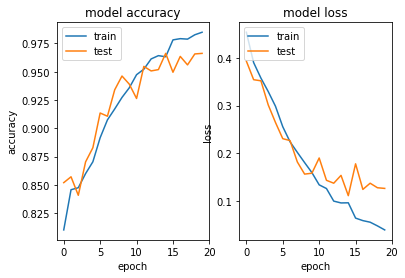

Starting predictions:
Accuracy: 96.50% 
 Time: 14.239822387695312s 
 Time/example : 0.014239822387695313s/ex
1000/1000 [==============================] - 15s 15ms/step
'Binary' accuracy ((TP+TN)/total) sample number is:
0.965
'Binary' confusion ((FP+FN)/total) sample number is:
0.035
False Positive sample number is:
35.0
Precision is:
0.965
Recall is:
0.965
F1 score is:
0.965


In [4]:
#print(header)

import time
batch_size = 32
checkpoint_dir = ""

raw_data = np.column_stack((SpamEmails,EnronEmails)).T

print("DEBUG::raw_data:")
print(raw_data)

encoder.process(raw_data, max_cells)
X, y = encoder.encode_data(raw_data, header, maxlen)

print("DEBUG::X")
print(X)
print("DEBUG::y")
print(y)

Classifier = Simon(encoder=encoder)
data = Classifier.setup_test_sets(X, y)
category_count = y.shape[1] 
model = Classifier.generate_model(maxlen, max_cells, category_count)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['binary_accuracy'])
start = time.time()
history = Classifier.train_model(batch_size, checkpoint_dir, model, nb_epoch, data)
end = time.time()
print("Time for training is %f sec"%(end-start))
config = { 'encoder' :  encoder,
           'checkpoint' : Classifier.get_best_checkpoint(checkpoint_dir) }
Classifier.save_config(config, checkpoint_dir)
Classifier.plot_loss(history) #comment out on docker images...
        
pred_headers = Classifier.evaluate_model(max_cells, model, data, encoder, p_threshold)
#print("DEBUG::The predicted headers are:")
#print(pred_headers)
#print("DEBUG::The actual headers are:")
#print(header)

In [5]:
import os
os.listdir(".")

['.pkl',
 'text-class.02-0.35.hdf5',
 'logs',
 'unencoded_chars.json',
 'text-class.03-0.35.hdf5',
 'text-class.06-0.23.hdf5',
 'text-class.07-0.23.hdf5',
 'text-class.15-0.11.hdf5',
 'text-class.05-0.26.hdf5',
 '__notebook_source__.ipynb',
 'text-class.04-0.30.hdf5',
 'text-class.09-0.16.hdf5',
 'text-class.01-0.39.hdf5',
 '.ipynb_checkpoints',
 'text-class.13-0.14.hdf5',
 'text-class.12-0.14.hdf5',
 'text-class.08-0.18.hdf5']

In [6]:
from IPython.display import HTML
def create_download_link(title = "Download file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
# create_download_link(filename='text-class.10-0.15.hdf5')